# All protocol consolidation

## Importing other Python Libraries/Modules

In [1]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
from eloscore import eloscore

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Summary

- Experiment

- Data

- Purpose of this Jupyter Notebook


In [6]:
all_final_elo_score_file_paths = glob.glob("./pilot*/**/*final_elo_score*.csv", recursive=True)

In [7]:
all_final_elo_score_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29/tube_test_final_elo_score_cages_1_2_3_4_5_6_date_2022-07-11_2022-07-29.csv',
 './pilot_2/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_1_2_3_4_5_

In [8]:
len(all_final_elo_score_file_paths)

12

In [9]:
all_final_elo_score_df = []
for file_path in all_final_elo_score_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    per_experiment_df["subject_id"] = per_experiment_df["subject_id"].astype(float).astype(str)
    print(file_path)
    print(per_experiment_df["subject_id"].unique())
    all_final_elo_score_df.append(per_experiment_df)

./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv
['3.1' '3.2' '3.3' '3.4' '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '

In [10]:
combined_final_elo_score_df = pd.concat(all_final_elo_score_df)
combined_final_elo_score_df = combined_final_elo_score_df.reset_index(drop=True)

In [11]:
combined_final_elo_score_df.head()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
0,1,1.1,1062.2,pilot_1,C57,tube_test,2.0
1,1,1.2,927.1,pilot_1,C57,tube_test,3.0
2,1,1.3,775.7,pilot_1,C57,tube_test,4.0
3,1,1.4,1235.0,pilot_1,C57,tube_test,1.0
4,2,2.1,1122.6,pilot_1,C57,tube_test,2.0


In [12]:
combined_final_elo_score_df["subject_id"].unique()

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4'], dtype=object)

In [13]:
combined_final_elo_score_df.tail()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
222,3,3.4,990.6,pilot_3,CD1,urine_marking,3.0
223,4,4.1,981.1,pilot_3,CD1,urine_marking,4.0
224,4,4.2,990.0,pilot_3,CD1,urine_marking,3.0
225,4,4.3,1010.0,pilot_3,CD1,urine_marking,2.0
226,4,4.4,1018.9,pilot_3,CD1,urine_marking,1.0


In [14]:
# experiment_to_elo_score_df = defaultdict(dict)
all_experiment_df = []
for experiment in combined_final_elo_score_df["experiment_type"].unique():
    experiment_df = combined_final_elo_score_df[combined_final_elo_score_df["experiment_type"] == experiment].copy()
    experiment_df = experiment_df.rename(columns={'final_elo_score': "{}_final_elo_score".format(experiment), 'rank': "{}_rank".format(experiment)})
    experiment_df = experiment_df.drop(columns=["experiment_type"])
    experiment_df["subject_id"] = experiment_df["subject_id"].astype(str)
    experiment_df["cage"] = experiment_df["cage"].astype(str)
    all_experiment_df.append(experiment_df)

merged_final_elo_score_df = None
for experiment_df in all_experiment_df:
    if merged_final_elo_score_df is None:
        merged_final_elo_score_df = experiment_df 
    else:
        merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='outer', left_on=["cage", "subject_id", "cohort", "strain"], right_on = ["cage", "subject_id", "cohort", "strain"])
#         break
merged_final_elo_score_df = merged_final_elo_score_df.drop_duplicates(subset=["cage", "subject_id", "cohort", "strain"], keep="last")
merged_final_elo_score_df = merged_final_elo_score_df.reset_index(drop=True)

In [15]:
merged_final_elo_score_df.head(n=50)

,cage,subject_id,urine_marking_final_elo_score,cohort,strain,urine_marking_rank,reward_competition_final_elo_score,reward_competition_rank,home_cage_observation_final_elo_score,home_cage_observation_rank,tube_test_final_elo_score,tube_test_rank
0,1,1.1,1019.2,pilot_1,C57,1.0,1097.1,1.0,NaN,NaN,1062.2,2.0
1,1,1.2,992.0,pilot_1,C57,3.0,1063.9,2.0,NaN,NaN,927.1,3.0
2,1,1.3,971.9,pilot_1,C57,4.0,901.8,4.0,NaN,NaN,775.7,4.0
3,1,1.4,1016.9,pilot_1,C57,2.0,937.2,3.0,NaN,NaN,1235.0,1.0
4,2,2.1,1037.4,pilot_1,C57,1.0,1071.7,1.0,NaN,NaN,1122.6,2.0
5,2,2.2,972.0,pilot_1,C57,4.0,918.3,4.0,NaN,NaN,947.8,3.0
6,2,2.3,1009.2,pilot_1,C57,2.0,973.7,3.0,NaN,NaN,780.7,4.0
7,2,2.4,981.4,pilot_1,C57,3.0,1036.3,2.0,NaN,NaN,1148.9,1.0
8,3,3.1,1010.6,pilot_1,CD1,1.0,1131.2,1.0,1185.0,1.0,784.5,4.0
9,3,3.2,999.4,pilot_1,CD1,3.0,954.6,3.0,889.6,4.0,1228.3,1.0


In [16]:
sorted(merged_final_elo_score_df.columns)

['cage',
 'cohort',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'strain',
 'subject_id',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [17]:
sorted_columns = ['cage',
 'cohort',
 'strain',
 'subject_id',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [18]:
merged_final_elo_score_df = merged_final_elo_score_df[sorted_columns]

In [19]:
merged_final_elo_score_df.to_csv("./proc/combined_final_elo_score_df.csv")

## Urine Marking Assay

In [20]:
urine_marking_file_paths = glob.glob("./**/*urine_marking_elo_score_history*.csv", recursive=True)

In [21]:
urine_marking_file_paths

['./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_elo_score_history_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-08-08/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-07-11_2022-08-08.csv',
 './pilot_3/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-09-12_2022-09-16/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-09-12_2022-09-16.csv',
 './pilot_3/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-09-12_2022-09-16/urine_marking_elo_score_history_cages_1_2_3_4_date_2022-09-12_2022-09-16.csv']

In [22]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_csv(file_path, index_col=0))

In [23]:
combined_urine_marking_df = pd.concat(all_urine_marking_df)
combined_urine_marking_df = combined_urine_marking_df.reset_index(drop=True)

In [24]:
combined_urine_marking_df = combined_urine_marking_df.reset_index()

- For even rows, the left pee spots correspond to the subject's pee spots

In [25]:
even_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 == 0].copy()

In [26]:
even_urine_marking_df.columns

Index(['index', 'total_match_number', 'subject_id', 'agent_id',
       'original_elo_score', 'updated_elo_score', 'win_draw_loss',
       'subject_ranking', 'agent_ranking', 'animal_id', 'date',
       'left_number_of_spots', 'loser', 'match', 'right_number_of_spots',
       'session_number', 'session_number_difference', 'spot_number_difference',
       'spot_number_then_percent_tie', 'spot_number_tie',
       'spot_percent_difference', 'spot_percent_tie', 'ties', 'winner', 'cage',
       'processed_cage_number', 'experiment_type', 'strain', 'cohort',
       'notes'],
      dtype='object')

In [27]:
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_id": "left_subject_id"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_ranking": "left_ranking"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"updated_elo_score": "left_elo_score"})
even_urine_marking_df = even_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "right_number_of_spots", "original_elo_score"])
even_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(even_urine_marking_df)))

In [28]:
odd_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 != 0].copy()

In [29]:
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_id": "right_subject_id"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_ranking": "right_ranking"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"updated_elo_score": "right_elo_score"})
odd_urine_marking_df = odd_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "left_number_of_spots", "original_elo_score"])
odd_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(odd_urine_marking_df)))

In [30]:
even_urine_marking_df.head()

,matching_index,index,total_match_number,left_subject_id,left_elo_score,win_draw_loss,left_ranking,animal_id,date,left_number_of_spots,...,spot_percent_difference,spot_percent_tie,ties,winner,cage,processed_cage_number,experiment_type,strain,cohort,notes
0,1,0,1,1.1,1000.0,0.5,1,"['1.1', '1.3']",2022-05-19,4.0,...,200.000000,False,NaN,1.1,CAGE1,1,urine_marking,C57,pilot_1,NaN
2,2,2,2,1.4,1010.0,1.0,1,"['1.2', '1.4']",2022-05-19,0.0,...,200.000000,False,NaN,1.4,CAGE1,1,urine_marking,C57,pilot_1,NaN
4,3,4,3,1.2,990.3,0.5,4,"['1.1', '1.2']",2022-05-20,12.0,...,34.482759,False,NaN,1.2,CAGE1,1,urine_marking,C57,pilot_1,NaN
6,4,6,4,1.4,1019.7,1.0,1,"['1.3', '1.4']",2022-05-20,0.0,...,200.000000,False,NaN,1.4,CAGE1,1,urine_marking,C57,pilot_1,NaN
8,5,8,5,1.1,1000.3,0.5,2,"['1.1', '1.4']",2022-05-24,18.0,...,18.181818,True,NaN,1.1,CAGE1,1,urine_marking,C57,pilot_1,NaN


In [31]:
odd_urine_marking_df.head()

,matching_index,index,total_match_number,right_subject_id,right_elo_score,win_draw_loss,right_ranking,animal_id,date,loser,...,spot_percent_difference,spot_percent_tie,ties,winner,cage,processed_cage_number,experiment_type,strain,cohort,notes
1,1,1,1,1.3,1000.0,0.5,2,"['1.1', '1.3']",2022-05-19,1.3,...,200.000000,False,NaN,1.1,CAGE1,1,urine_marking,C57,pilot_1,NaN
3,2,3,2,1.2,990.0,0.0,4,"['1.2', '1.4']",2022-05-19,1.2,...,200.000000,False,NaN,1.4,CAGE1,1,urine_marking,C57,pilot_1,NaN
5,3,5,3,1.1,999.7,0.5,3,"['1.1', '1.2']",2022-05-20,1.1,...,34.482759,False,NaN,1.2,CAGE1,1,urine_marking,C57,pilot_1,NaN
7,4,7,4,1.3,990.3,0.0,3,"['1.3', '1.4']",2022-05-20,1.3,...,200.000000,False,NaN,1.4,CAGE1,1,urine_marking,C57,pilot_1,NaN
9,5,9,5,1.4,1019.1,0.5,1,"['1.1', '1.4']",2022-05-24,1.4,...,18.181818,True,NaN,1.1,CAGE1,1,urine_marking,C57,pilot_1,NaN


In [32]:
cols_to_use = list(odd_urine_marking_df.columns.difference(even_urine_marking_df.columns))
cols_to_use.append("matching_index")

In [33]:
cols_to_use

['right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'matching_index']

In [34]:
urine_marking_left_right = pd.merge(even_urine_marking_df, odd_urine_marking_df[cols_to_use], left_on=["matching_index"], right_on=["matching_index"], how='outer')

In [35]:
urine_marking_left_right

,matching_index,index,total_match_number,left_subject_id,left_elo_score,win_draw_loss,left_ranking,animal_id,date,left_number_of_spots,...,cage,processed_cage_number,experiment_type,strain,cohort,notes,right_elo_score,right_number_of_spots,right_ranking,right_subject_id
0,1,0,1,1.1,1000.0,0.5,1,"['1.1', '1.3']",2022-05-19,4.0,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,1000.0,0.0,2,1.3
1,2,2,2,1.4,1010.0,1.0,1,"['1.2', '1.4']",2022-05-19,0.0,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,990.0,6.0,4,1.2
2,3,4,3,1.2,990.3,0.5,4,"['1.1', '1.2']",2022-05-20,12.0,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,999.7,17.0,3,1.1
3,4,6,4,1.4,1019.7,1.0,1,"['1.3', '1.4']",2022-05-20,0.0,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,990.3,10.0,3,1.3
4,5,8,5,1.1,1000.3,0.5,2,"['1.1', '1.4']",2022-05-24,18.0,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,1019.1,15.0,1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,165,328,2,4.4,1010.0,1.0,2,"['3', '4']",2022-09-12,24.0,...,CAGE4,4,urine_marking,CD1,pilot_3,3 hours,990.0,60.0,4,4.3
165,166,330,3,4.3,1000.0,1.0,3,"['1', '3']",2022-09-13,11.0,...,CAGE4,4,urine_marking,CD1,pilot_3,3 hours,980.0,90.0,4,4.1
166,167,332,4,4.4,1020.0,1.0,1,"['2', '4']",2022-09-13,96.0,...,CAGE4,4,urine_marking,CD1,pilot_3,3 hours,1000.0,5.0,2,4.2
167,168,334,5,4.4,1018.9,0.5,1,"['1', '4']",2022-09-16,82.0,...,CAGE4,4,urine_marking,CD1,pilot_3,3 hours,981.1,97.0,4,4.1


In [36]:
sorted(urine_marking_left_right.columns)

['animal_id',
 'cage',
 'cohort',
 'date',
 'experiment_type',
 'index',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'loser',
 'match',
 'matching_index',
 'notes',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'spot_number_difference',
 'spot_number_then_percent_tie',
 'spot_number_tie',
 'spot_percent_difference',
 'spot_percent_tie',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner']

In [37]:
sorted_columns = ['experiment_type',
 'cohort',
 'cage',
 'processed_cage_number',
 'strain',
 'date',
 'match',
 'winner',
 'loser',
 'ties',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'total_match_number',
 'win_draw_loss',
 ]

In [38]:
urine_marking_left_right = urine_marking_left_right[sorted_columns]

In [39]:
urine_marking_left_right.head()

,experiment_type,cohort,cage,processed_cage_number,strain,date,match,winner,loser,ties,...,left_ranking,left_subject_id,right_elo_score,right_number_of_spots,right_ranking,right_subject_id,session_number,session_number_difference,total_match_number,win_draw_loss
0,urine_marking,pilot_1,CAGE1,1,C57,2022-05-19,1.1 v 1.3,1.1,1.3,NaN,...,1,1.1,1000.0,0.0,2,1.3,1.0,NaN,1,0.5
1,urine_marking,pilot_1,CAGE1,1,C57,2022-05-19,1.2 v 1.4,1.4,1.2,NaN,...,1,1.4,990.0,6.0,4,1.2,2.0,1.0,2,1.0
2,urine_marking,pilot_1,CAGE1,1,C57,2022-05-20,1.1 v 1.2,1.2,1.1,NaN,...,4,1.2,999.7,17.0,3,1.1,3.0,1.0,3,0.5
3,urine_marking,pilot_1,CAGE1,1,C57,2022-05-20,1.3 v 1.4,1.4,1.3,NaN,...,1,1.4,990.3,10.0,3,1.3,4.0,1.0,4,1.0
4,urine_marking,pilot_1,CAGE1,1,C57,2022-05-24,1.1 v 1.4,1.1,1.4,NaN,...,2,1.1,1019.1,15.0,1,1.4,5.0,1.0,5,0.5


In [40]:
urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)

/tmp/ipykernel_486/328799236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
/tmp/ipykernel_486/328799236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)


In [41]:
merged_final_elo_score_df["subject_id"] = merged_final_elo_score_df["subject_id"].astype(str)

In [42]:
left_merged_final_elo_score_df = merged_final_elo_score_df

In [43]:
left_subject_column_renaming = {}
for col in left_merged_final_elo_score_df.columns:
    left_subject_column_renaming[col] = "left_" + col

In [44]:
left_merged_final_elo_score_df = left_merged_final_elo_score_df.rename(columns=left_subject_column_renaming)

In [45]:
right_merged_final_elo_score_df = merged_final_elo_score_df

In [46]:
right_subject_column_renaming = {}
for col in right_merged_final_elo_score_df.columns:
    right_subject_column_renaming[col] = "right_" + col

In [47]:
right_merged_final_elo_score_df = right_merged_final_elo_score_df.rename(columns=right_subject_column_renaming)

In [48]:
cols_to_use = list(urine_marking_left_right.columns.difference(left_merged_final_elo_score_df.columns))
# cols_to_use.append("cohort")
cols_to_use.append("left_subject_id")

In [49]:
cols_to_use


['cage',
 'cohort',
 'date',
 'experiment_type',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'loser',
 'match',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner',
 'left_subject_id']

In [50]:
urine_and_elo_score_df = pd.merge(urine_marking_left_right[cols_to_use], left_merged_final_elo_score_df, left_on=["left_subject_id", "cohort"], right_on=["left_subject_id", "left_cohort"], how='inner')

In [51]:
cols_to_use = list(urine_and_elo_score_df.columns.difference(right_merged_final_elo_score_df.columns))
cols_to_use.append("right_subject_id")

In [52]:
urine_and_elo_score_df = pd.merge(urine_and_elo_score_df[cols_to_use], right_merged_final_elo_score_df, left_on=["right_subject_id", "cohort"], right_on=["right_subject_id", "right_cohort"], how='inner')

In [53]:
urine_and_elo_score_df["pee_spot_difference"] = urine_and_elo_score_df["left_number_of_spots"] - urine_and_elo_score_df["right_number_of_spots"]
urine_and_elo_score_df["tube_test_elo_score_difference"] = urine_and_elo_score_df["left_tube_test_final_elo_score"] - urine_and_elo_score_df["right_tube_test_final_elo_score"]
urine_and_elo_score_df["home_cage_observation_elo_score_difference"] = urine_and_elo_score_df["left_home_cage_observation_final_elo_score"] - urine_and_elo_score_df["right_home_cage_observation_final_elo_score"]
urine_and_elo_score_df["reward_competition_elo_score_difference"] = urine_and_elo_score_df["left_reward_competition_final_elo_score"] - urine_and_elo_score_df["right_reward_competition_final_elo_score"]

urine_and_elo_score_df["tube_test_rank_difference"] = urine_and_elo_score_df["left_tube_test_rank"] - urine_and_elo_score_df["right_tube_test_rank"]
urine_and_elo_score_df["home_cage_observation_rank_difference"] = urine_and_elo_score_df["left_home_cage_observation_rank"] - urine_and_elo_score_df["right_home_cage_observation_rank"]
urine_and_elo_score_df["reward_competition_rank_difference"] = urine_and_elo_score_df["left_reward_competition_rank"] - urine_and_elo_score_df["right_reward_competition_rank"]


In [54]:
sorted(urine_and_elo_score_df.columns)

['cage',
 'cohort',
 'date',
 'experiment_type',
 'home_cage_observation_elo_score_difference',
 'home_cage_observation_rank_difference',
 'left_cage',
 'left_cohort',
 'left_elo_score',
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_number_of_spots',
 'left_ranking',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_strain',
 'left_subject_id',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',
 'loser',
 'match',
 'pee_spot_difference',
 'processed_cage_number',
 'reward_competition_elo_score_difference',
 'reward_competition_rank_difference',
 'right_cage',
 'right_cohort',
 'right_elo_score',
 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_number_of_spots',
 'right_ranking',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_strain',
 'right_subject_id'

In [55]:
sorted_columns = ['cohort',
 'cage',
 'processed_cage_number',
 'strain',

 'date',
 'winner',
 'loser',
 'ties',

 'left_subject_id',
 'left_elo_score',
 'left_ranking',
 'right_subject_id',
 'right_elo_score',
 'right_ranking',
 'left_number_of_spots',
 'right_number_of_spots',
 'pee_spot_difference', 
 'tube_test_elo_score_difference',
 'home_cage_observation_elo_score_difference',
 'reward_competition_elo_score_difference',
 'tube_test_rank_difference',
 'home_cage_observation_rank_difference',
 'reward_competition_rank_difference',  
                  
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',

 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',
 'right_urine_marking_final_elo_score',
 'right_urine_marking_rank',

 'session_number',
 'session_number_difference',
 'total_match_number']

In [56]:
urine_and_elo_score_df = urine_and_elo_score_df[sorted_columns]

In [57]:
urine_and_elo_score_df

,cohort,cage,processed_cage_number,strain,date,winner,loser,ties,left_subject_id,left_elo_score,...,right_home_cage_observation_rank,right_reward_competition_final_elo_score,right_reward_competition_rank,right_tube_test_final_elo_score,right_tube_test_rank,right_urine_marking_final_elo_score,right_urine_marking_rank,session_number,session_number_difference,total_match_number
0,pilot_1,CAGE1,1,C57,2022-05-19,1.1,1.3,NaN,1.1,1000.0,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,1.0,NaN,1
1,pilot_1,CAGE1,1,C57,2022-05-26,1.1,1.3,tie,1.1,1019.2,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,9.0,1.0,9
2,pilot_1,CAGE1,1,C57,2022-05-20,1.4,1.3,NaN,1.4,1019.7,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,4.0,1.0,4
3,pilot_1,CAGE1,1,C57,2022-05-25,1.4,1.3,tie,1.4,1028.3,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,8.0,1.0,8
4,pilot_1,CAGE1,1,C57,2022-05-24,1.2,1.3,tie,1.2,990.3,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,6.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,pilot_3,CAGE6,6,NaN,2022-09-13,6.3,6.1,NaN,6.3,1019.7,...,NaN,NaN,NaN,1137.7,1.0,NaN,NaN,3.0,1.0,3
342,pilot_3,CAGE6,6,NaN,2022-09-16,6.4,6.1,NaN,6.4,1000.0,...,NaN,NaN,NaN,NaN,NaN,980.3,4.0,5.0,2.0,4
343,pilot_3,CAGE6,6,NaN,2022-09-16,6.4,6.1,NaN,6.4,1000.0,...,NaN,NaN,NaN,1137.7,1.0,NaN,NaN,5.0,2.0,4
344,pilot_3,CAGE6,6,NaN,2022-09-16,6.4,6.1,NaN,6.4,1000.0,...,NaN,NaN,NaN,NaN,NaN,980.3,4.0,5.0,2.0,4


In [58]:
urine_and_elo_score_df.to_csv("./proc/urine_marking_with_all_elo_score.csv")

In [59]:
urine_and_elo_score_df.dropna(axis=1)

,cohort,cage,processed_cage_number,date,winner,loser,left_subject_id,left_elo_score,left_ranking,right_subject_id,right_elo_score,right_ranking,left_number_of_spots,right_number_of_spots,pee_spot_difference,session_number,total_match_number
0,pilot_1,CAGE1,1,2022-05-19,1.1,1.3,1.1,1000.0,1,1.3,1000.0,2,4.0,0.0,4.0,1.0,1
1,pilot_1,CAGE1,1,2022-05-26,1.1,1.3,1.1,1019.2,2,1.3,971.9,4,43.0,0.0,43.0,9.0,9
2,pilot_1,CAGE1,1,2022-05-20,1.4,1.3,1.4,1019.7,1,1.3,990.3,3,0.0,10.0,-10.0,4.0,4
3,pilot_1,CAGE1,1,2022-05-25,1.4,1.3,1.4,1028.3,1,1.3,981.1,3,0.0,8.0,-8.0,8.0,8
4,pilot_1,CAGE1,1,2022-05-24,1.2,1.3,1.2,990.3,4,1.3,990.3,3,0.0,0.0,0.0,6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,pilot_3,CAGE6,6,2022-09-13,6.3,6.1,6.3,1019.7,1,6.1,990.3,3,2.0,31.0,-29.0,3.0,3
342,pilot_3,CAGE6,6,2022-09-16,6.4,6.1,6.4,1000.0,3,6.1,980.3,4,1.0,26.0,-25.0,5.0,4
343,pilot_3,CAGE6,6,2022-09-16,6.4,6.1,6.4,1000.0,3,6.1,980.3,4,1.0,26.0,-25.0,5.0,4
344,pilot_3,CAGE6,6,2022-09-16,6.4,6.1,6.4,1000.0,3,6.1,980.3,4,1.0,26.0,-25.0,5.0,4


In [60]:
urine_and_elo_score_df.columns.difference(urine_and_elo_score_df.dropna(axis=1).columns)

Index(['home_cage_observation_elo_score_difference',
       'home_cage_observation_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'left_reward_competition_final_elo_score',
       'left_reward_competition_rank', 'left_tube_test_final_elo_score',
       'left_tube_test_rank', 'left_urine_marking_final_elo_score',
       'left_urine_marking_rank', 'reward_competition_elo_score_difference',
       'reward_competition_rank_difference',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank',
       'right_reward_competition_final_elo_score',
       'right_reward_competition_rank', 'right_tube_test_final_elo_score',
       'right_tube_test_rank', 'right_urine_marking_final_elo_score',
       'right_urine_marking_rank', 'session_number_difference', 'strain',
       'ties', 'tube_test_elo_score_difference', 'tube_test_rank_difference'],
      dtype='object')

# Plotting

In [61]:
urine_and_elo_score_df["winner_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] >= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)
urine_and_elo_score_df["loser_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] <= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)

In [76]:
urine_and_elo_score_df.columns

Index(['cohort', 'cage', 'processed_cage_number', 'strain', 'date', 'winner',
       'loser', 'ties', 'left_subject_id', 'left_elo_score', 'left_ranking',
       'right_subject_id', 'right_elo_score', 'right_ranking',
       'left_number_of_spots', 'right_number_of_spots', 'pee_spot_difference',
       'tube_test_elo_score_difference',
       'home_cage_observation_elo_score_difference',
       'reward_competition_elo_score_difference', 'tube_test_rank_difference',
       'home_cage_observation_rank_difference',
       'reward_competition_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'left_reward_competition_final_elo_score',
       'left_reward_competition_rank', 'left_tube_test_final_elo_score',
       'left_tube_test_rank', 'left_urine_marking_final_elo_score',
       'left_urine_marking_rank',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank',
       'right_reward

In [62]:
urine_and_elo_score_df["adjusted_winner_number_of_spots"] = urine_and_elo_score_df["winner_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_loser_number_of_spots"] = urine_and_elo_score_df["loser_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_pee_spot_difference"] = urine_and_elo_score_df["pee_spot_difference"].abs().apply(lambda x: 100 if x >= 100 else x)

In [63]:
c57_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "C57"]

(array([21., 13., 11.,  8.,  1.,  1.,  2.,  2.,  0.,  0.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([  0. ,   9.8,  19.6,  29.4,  39.2,  49. ,  58.8,  68.6,  78.4,
         88.2,  98. , 107.8, 117.6, 127.4, 137.2, 147. , 156.8, 166.6,
        176.4, 186.2, 196. , 205.8, 215.6, 225.4, 235.2, 245. , 254.8,
        264.6, 274.4, 284.2, 294. ]),
 <BarContainer object of 30 artists>)

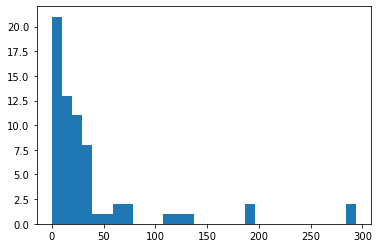

In [64]:
plt.hist(c57_df["winner_number_of_spots"], bins=30)

(array([10.,  5.,  5.,  6.,  1.,  5.,  4.,  4.,  3.,  2.,  3.,  1.,  2.,
         1.,  0.,  1.,  1.,  3.,  2.,  0.,  2.,  1.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        , 14.93333333, 15.86666667, 16.8       , 17.73333333,
        18.66666667, 19.6       , 20.53333333, 21.46666667, 22.4       ,
        23.33333333, 24.26666667, 25.2       , 26.13333333, 27.06666667,
        28.        ]),
 <BarContainer object of 30 artists>)

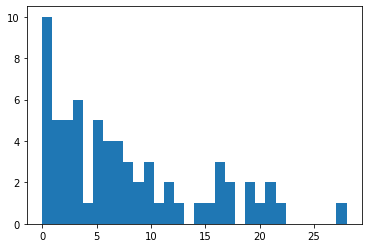

In [65]:
plt.hist(c57_df["loser_number_of_spots"], bins=30)

In [66]:
bins = 30

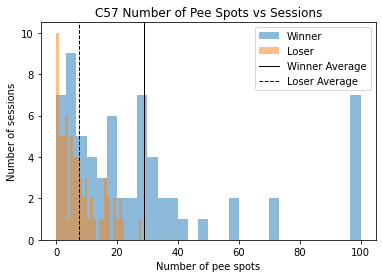

In [67]:
plt.hist(c57_df["adjusted_winner_number_of_spots"], bins, alpha=0.5, label='Winner')
plt.hist(c57_df["adjusted_loser_number_of_spots"], bins, alpha=0.5, label='Loser')
plt.axvline(c57_df["adjusted_winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(c57_df["adjusted_loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")
plt.title("C57 Number of Pee Spots vs Sessions")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/c57_pee_spots.png")
plt.show()

In [68]:
cd1_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "CD1"]

In [69]:
bins = 30

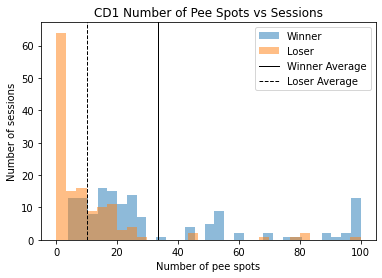

In [70]:
plt.hist(cd1_df["adjusted_winner_number_of_spots"], bins, alpha=0.5, label='Winner')
plt.hist(cd1_df["adjusted_loser_number_of_spots"], bins, alpha=0.5, label='Loser')
plt.axvline(cd1_df["adjusted_winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(cd1_df["adjusted_loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")
plt.title("CD1 Number of Pee Spots vs Sessions")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/cd1_pee_spots.png")
plt.show()

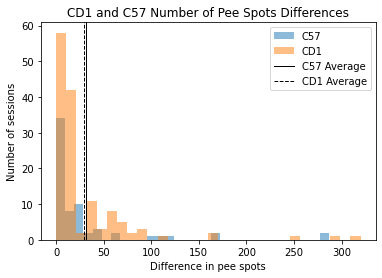

In [71]:
plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57')
plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1')

# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("CD1 and C57 Number of Pee Spots Differences")
plt.xlabel("Difference in pee spots")
plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/pee_spot_difference.png")

plt.show()

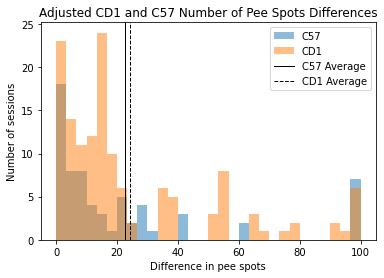

In [72]:
plt.hist(c57_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='C57')
plt.hist(cd1_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1')

# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("Adjusted CD1 and C57 Number of Pee Spots Differences")
plt.xlabel("Difference in pee spots")
plt.axvline(c57_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/adjusted_pee_spot_difference.png")

plt.show()

## Changing the Urine Marking Threshold

In [73]:
c57_df

,cohort,cage,processed_cage_number,strain,date,winner,loser,ties,left_subject_id,left_elo_score,...,right_urine_marking_final_elo_score,right_urine_marking_rank,session_number,session_number_difference,total_match_number,winner_number_of_spots,loser_number_of_spots,adjusted_winner_number_of_spots,adjusted_loser_number_of_spots,adjusted_pee_spot_difference
0,pilot_1,CAGE1,1,C57,2022-05-19,1.1,1.3,NaN,1.1,1000.0,...,971.9,4.0,1.0,NaN,1,4.0,0.0,4.0,0.0,4.0
1,pilot_1,CAGE1,1,C57,2022-05-26,1.1,1.3,tie,1.1,1019.2,...,971.9,4.0,9.0,1.0,9,43.0,0.0,43.0,0.0,43.0
2,pilot_1,CAGE1,1,C57,2022-05-20,1.4,1.3,NaN,1.4,1019.7,...,971.9,4.0,4.0,1.0,4,10.0,0.0,10.0,0.0,10.0
3,pilot_1,CAGE1,1,C57,2022-05-25,1.4,1.3,tie,1.4,1028.3,...,971.9,4.0,8.0,1.0,8,8.0,0.0,8.0,0.0,8.0
4,pilot_1,CAGE1,1,C57,2022-05-24,1.2,1.3,tie,1.2,990.3,...,971.9,4.0,6.0,1.0,6,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,pilot_3,CAGE2,2,C57,2022-09-15,2.3,2.2,NaN,2.3,1000.0,...,970.6,4.0,4.0,1.0,4,28.0,3.0,28.0,3.0,25.0
238,pilot_3,CAGE2,2,C57,2022-09-15,2.4,2.1,NaN,2.4,1020.0,...,1009.4,2.0,3.0,1.0,3,188.0,16.0,100.0,16.0,100.0
239,pilot_3,CAGE2,2,C57,2022-09-15,2.4,2.1,NaN,2.4,1020.0,...,1009.4,2.0,3.0,1.0,3,188.0,16.0,100.0,16.0,100.0
240,pilot_3,CAGE2,2,C57,2022-09-16,2.3,2.4,tie,2.3,1000.6,...,1019.4,1.0,6.0,1.0,6,21.0,21.0,21.0,21.0,0.0
